In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [83]:
# COLOR_A = '#1b065e'
# COLOR_A_ACCENT = '#87f5fb'
# COLOR_B = '#da3c43'
# COLOR_B_ACCENT = '#efbcd5'

# COLOR_A = '#0E7C7B'
# COLOR_A_ACCENT = '#C2D3CD'
# COLOR_B = '#DA3C43'
# COLOR_B_ACCENT = '#FFA359'

COLOR_A = '#0E7C7B'
COLOR_A_ACCENT = '#AFD5BF'
COLOR_B = '#DA3C43'
COLOR_B_ACCENT = '#FFA359'

# COLOR_A_ACCENT = '#1a3a3a'
# COLOR_A = '#6c9a8b'
# COLOR_B_ACCENT = '#77181c'
# COLOR_B = '#DA3C43'

COLOR_A = '#7e8fa1'
COLOR_A_ACCENT = '#afc2d4'
COLOR_B = '#a4793d'
COLOR_B_ACCENT = '#dfba5f'

COLOR_A = '#63458a'
COLOR_A_ACCENT = '#aca2da'
COLOR_B = '#DA3C43'
COLOR_B_ACCENT = '#ff875c'


sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(18, 7), "xtick.bottom": True, "grid.linestyle": ":"})

In [84]:
#PATH = "../data/1602_newsetup"
PATH = "../data/2802_all_and_fullscreens"
#PATH = "../data/2002_newsetup_printf"
#PATH2 = "../data/2002_gdi_readers_newsetup"
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]
#files2 = os.listdir(PATH2)
#files2 = [x for x in files2 if 'csv' in x]

In [85]:
file_data = []
diff_means = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}")
    try:
        mean = data_in.query("fw != -1 & diff > 0")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
    except:
        print(data_in, file)
    file_data.append(data_in)

# for file in files2:
#     data_in = pd.read_csv(f"{PATH2}/{file}")
#     try:
#         mean = data_in.query("fw != -1 & diff > 0")['diff'].mean()
#         if not math.isnan(mean):
#             diff_means.append(mean)
#     except:
#         print(data_in, file)
#     file_data.append(data_in)
    
data = pd.concat(file_data)

In [86]:
data['ete'] = data['ete'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000

data.loc[data.program == 'windup_fullscreen', 'program'] = 'windup'
data

,Unnamed: 0,id,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,fw_running,program_fwrunning,ete,fw,diff
0,0,0,FLTK,default,FLTK_default,True,NaN,bitblt,False,bitblt_False,12.083,-0.001,12.084
1,1,1,FLTK,default,FLTK_default,True,NaN,bitblt,False,bitblt_False,11.697,-0.001,11.698
2,2,2,FLTK,default,FLTK_default,True,NaN,bitblt,False,bitblt_False,10.683,-0.001,10.684
3,3,3,FLTK,default,FLTK_default,True,NaN,bitblt,False,bitblt_False,8.699,-0.001,8.700
4,4,4,FLTK,default,FLTK_default,True,NaN,bitblt,False,bitblt_False,9.714,-0.001,9.715
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,wxpython,rects,wxpython_rects,True,2.0,windup,True,windup_fullscreen_True,43.632,40.124,3.508
196,196,196,wxpython,rects,wxpython_rects,True,2.0,windup,True,windup_fullscreen_True,44.609,41.124,3.485
197,197,197,wxpython,rects,wxpython_rects,True,2.0,windup,True,windup_fullscreen_True,45.628,42.224,3.404
198,198,198,wxpython,rects,wxpython_rects,True,2.0,windup,True,windup_fullscreen_True,44.604,41.167,3.437


In [87]:
data_fw_running = data[data['fw_running'] == True]
data_fw_not_running = data[data['fw_running'] == False]

In [88]:
framework_count = data['framework'].nunique()
sqrt = int(math.sqrt(framework_count)) + 1
framework_list = data['framework'].unique()

In [89]:
error_dict = {}
for framework in framework_list:
    data_fw = data_fw_running[data_fw_running['framework'] == framework]
    
    data_fw_default = data_fw[data_fw['complexity'] == 'default']
    num_negative_diff_default = data_fw_default[data_fw_default['diff'] < 0].count().iloc[0]
    num_no_fw_default = data_fw_default[data_fw_default['fw'] == -1].count().iloc[0]
    total_default = data_fw_default.count().iloc[0]

    data_fw_rects = data_fw[data_fw['complexity'] == 'rects']
    num_negative_diff_rects = data_fw_rects[data_fw_rects['diff'] < 0].count().iloc[0]
    num_no_fw_rects = data_fw_rects[data_fw_rects['fw'] == -1].count().iloc[0]
    total_rects = data_fw_rects.count().iloc[0]

    total = data_fw.count().iloc[0]

    error_dict[framework] = {'negative_diffs_default': num_negative_diff_default,
                              'negative_diffs_rects': num_negative_diff_rects,
                              'total_diffs': num_negative_diff_default + num_negative_diff_rects,
                              'total': total,
                              'rel_error': (num_negative_diff_default + num_negative_diff_rects) / total ,
                              'no_fw_default': num_no_fw_default,
                              'no_fw_rects': num_no_fw_rects,
                              'total_fw': num_no_fw_default + num_no_fw_rects
                            }

error_df = pd.DataFrame(error_dict).T
error_df = error_df.sort_values('total_diffs', ascending=False)
error_df

,negative_diffs_default,negative_diffs_rects,total_diffs,total,rel_error,no_fw_default,no_fw_rects,total_fw
pygame,250.0,13.0,263.0,2400.0,0.109583,0.0,0.0,0.0
win32,78.0,2.0,80.0,2400.0,0.033333,0.0,0.0,0.0
Unity,34.0,27.0,61.0,1600.0,0.038125,0.0,0.0,0.0
FLTK,0.0,0.0,0.0,2392.0,0.000000,0.0,0.0,0.0
GLUT,0.0,0.0,0.0,2236.0,0.000000,0.0,0.0,0.0
GTK,0.0,0.0,0.0,2203.0,0.000000,0.0,0.0,0.0
pyglet,0.0,0.0,0.0,2400.0,0.000000,0.0,0.0,0.0
pyqt5,0.0,0.0,0.0,2400.0,0.000000,0.0,0.0,0.0
pyqt6,0.0,0.0,0.0,2400.0,0.000000,0.0,0.0,0.0
SDL2_Direct3D,0.0,0.0,0.0,1000.0,0.000000,0.0,0.0,0.0


# E2E Latency

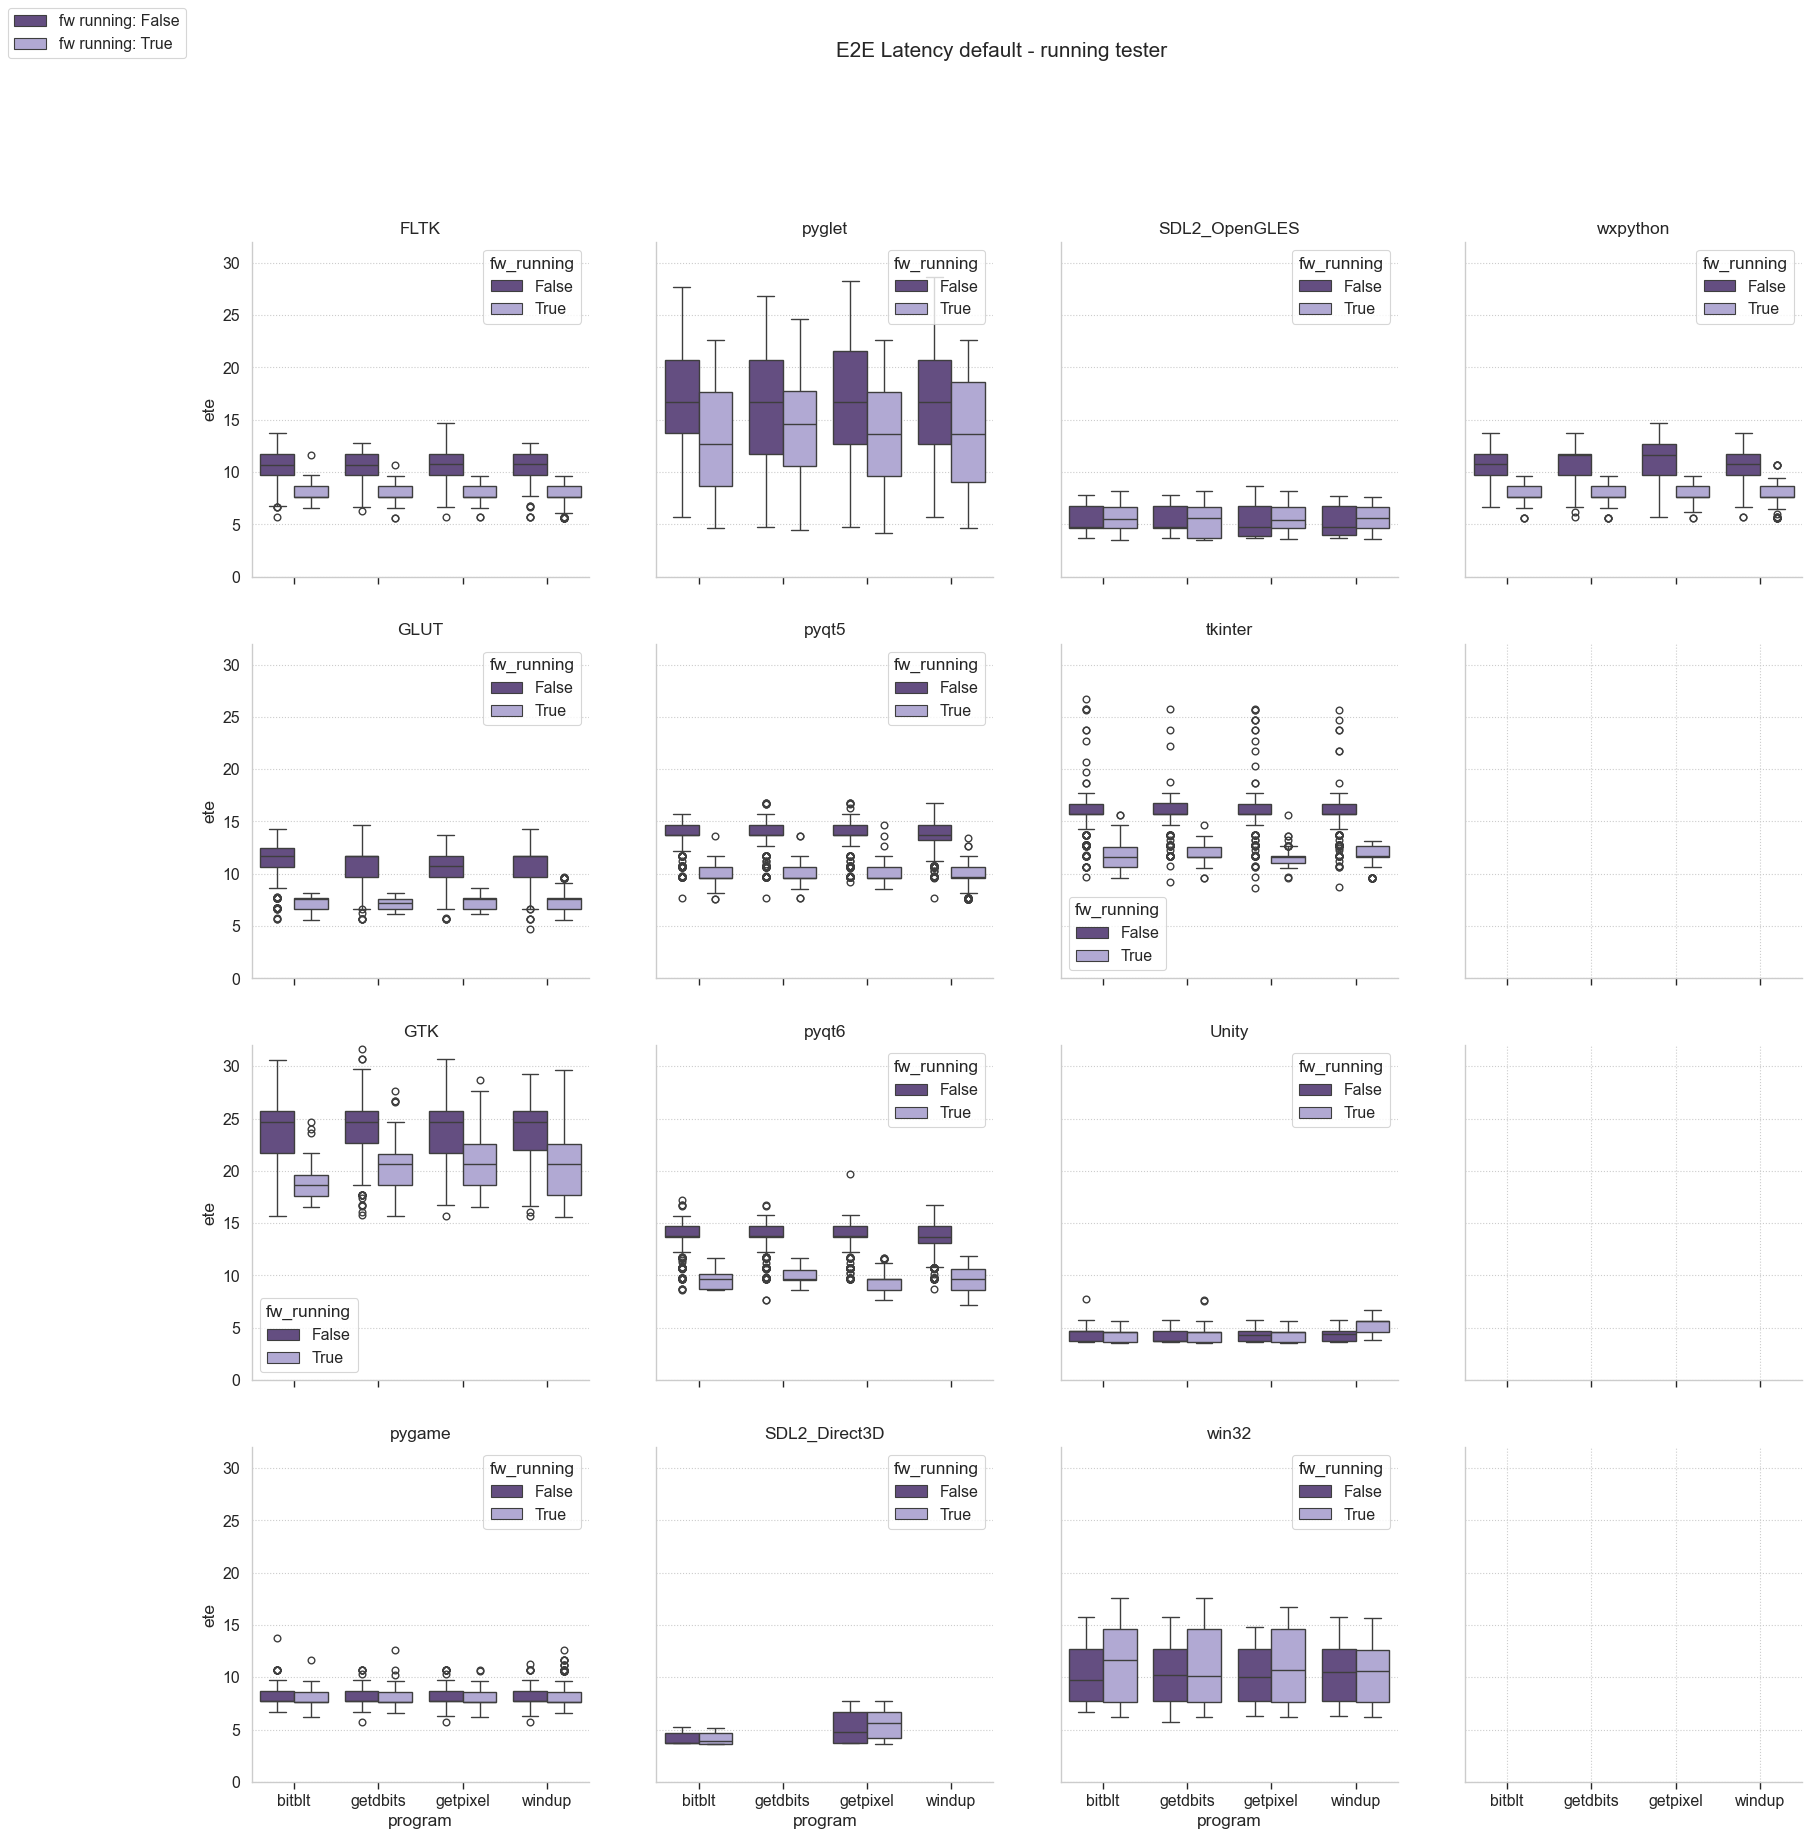

In [90]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("E2E Latency default - running tester")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data[((data['complexity'] == 'default') & (data['framework'] == framework))], x='program', y='ete', hue='fw_running', hue_order=[False, True], palette=[COLOR_A, COLOR_A_ACCENT])
    #sns.stripplot(ax=axes[x, y], data=data[((data['complexity'] == 'default') & (data['framework'] == framework))], x='program', y='ete', hue='fw_running', hue_order=[False, True], palette='dark:black', dodge=True, size=1)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 32)
    #axes[x, y].get_legend().set_visible(False)

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, ['fw running: ' + labels[0], 'fw running: ' + labels[1]], markerscale=5., loc='upper left')
sns.despine(bottom = False, left = False)

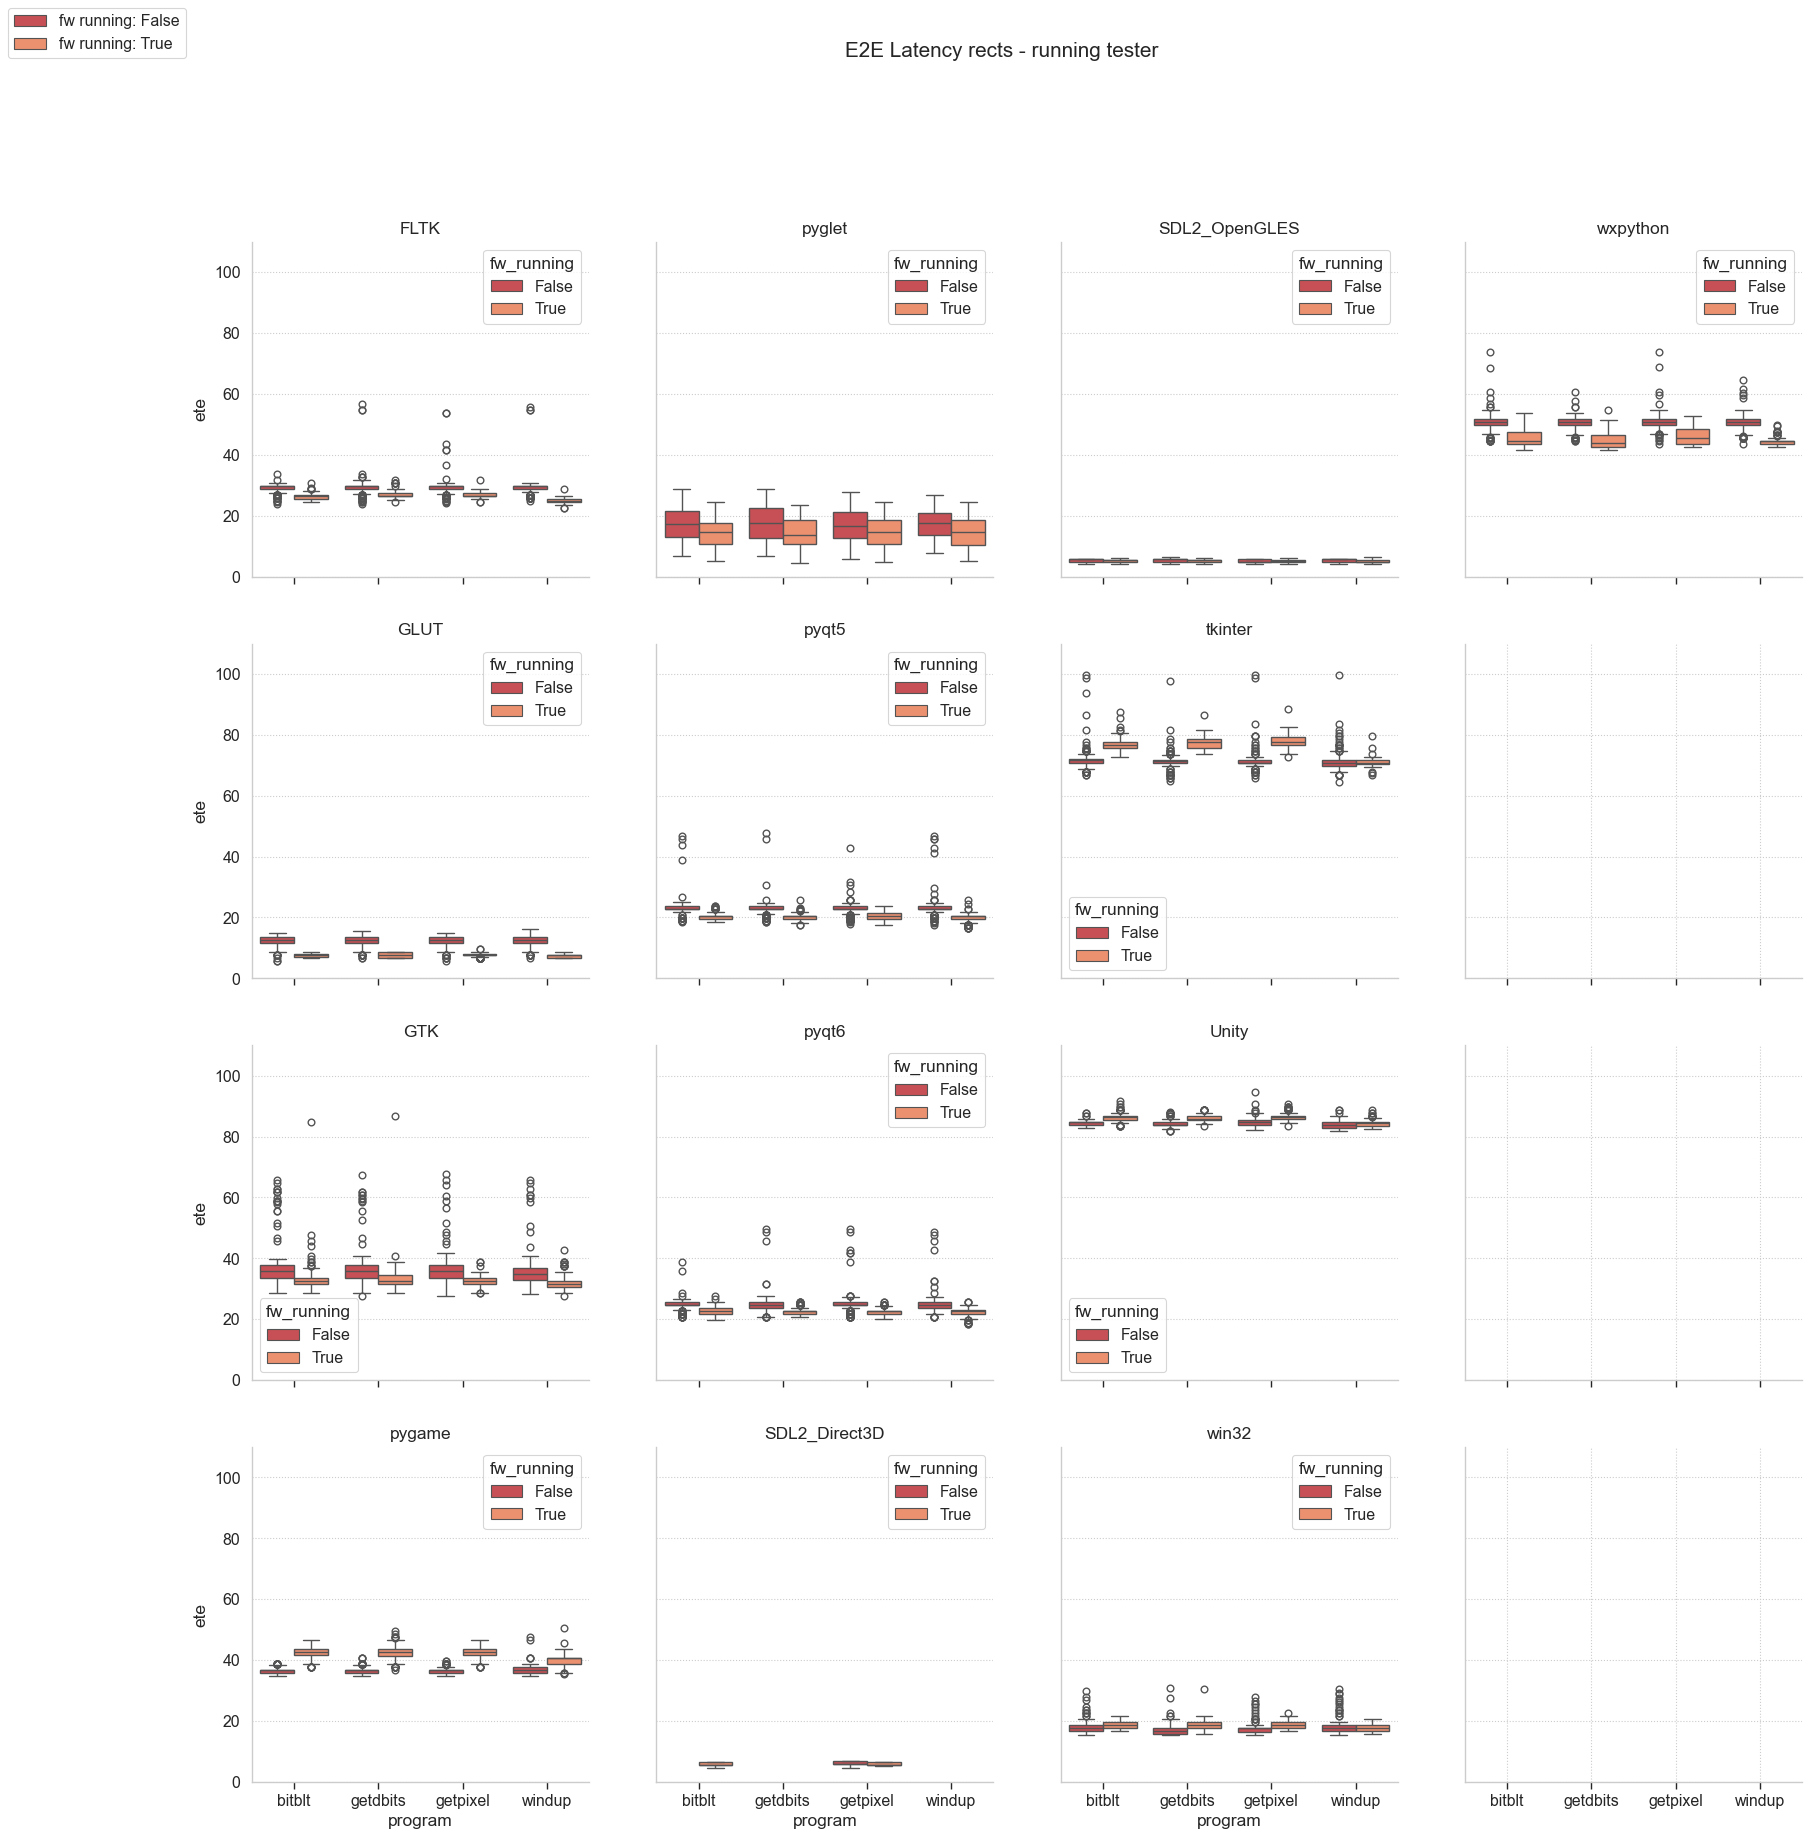

In [91]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("E2E Latency rects - running tester")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data[((data['complexity'] == 'rects') & (data['framework'] == framework))], x='program', y='ete', hue='fw_running', hue_order=[False, True], palette=[COLOR_B, COLOR_B_ACCENT])
    #sns.stripplot(ax=axes[x, y], data=data[((data['complexity'] == 'rects') & (data['framework'] == framework))], x='program', y='ete', hue='fw_running', hue_order=[False, True], dodge=True, palette='dark:black', size=1)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 110)
    #axes[x, y].get_legend().set_visible(False)

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, ['fw running: ' + labels[0], 'fw running: ' + labels[1]], markerscale=5., loc='upper left')
sns.despine(bottom = False, left = False)

In [92]:
# fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True, sharey=True)
# fig.suptitle("E2E Latency both complexities - running tester")

# x = y = 0
# for i, framework in enumerate(framework_list):
#     x = i % sqrt
#     y = y + 1 if (i != 0 and i % sqrt == 0) else y
#     sns.boxplot(ax=axes[x, y], data=data[data['framework'] == framework], x='program', y='ete', hue='fw_running', hue_order=[False, True], palette=['lightgrey', 'white'])
#     sns.stripplot(ax=axes[x, y], data=data[((data['complexity'] == 'default') & (data['framework'] == framework))], x='program', y='ete', hue='fw_running', hue_order=[False, True], dodge=True, palette=[COLOR_A, COLOR_A_ACCENT], size=1)
#     sns.stripplot(ax=axes[x, y], data=data[((data['complexity'] == 'rects') & (data['framework'] == framework))], x='program', y='ete', hue='fw_running', hue_order=[False, True], dodge=True, palette=[COLOR_B, COLOR_B_ACCENT], size=1)
#     axes[x, y].set_title(framework)
#     axes[x, y].set_ylim(0, 110)
#     axes[x, y].get_legend().set_visible(False)


# handles, labels = axes[0, 0].get_legend_handles_labels()
# handles_combined = [(handles[0], handles[2], handles[4]), (handles[1], handles[3], handles[5])]
# fig.legend(handles_combined, ['fw running: ' + labels[0], 'fw running: ' + labels[1]], markerscale=5., loc='upper left', handler_map={tuple: HandlerTuple(ndivide=None)})
# sns.despine(bottom = False, left = False)

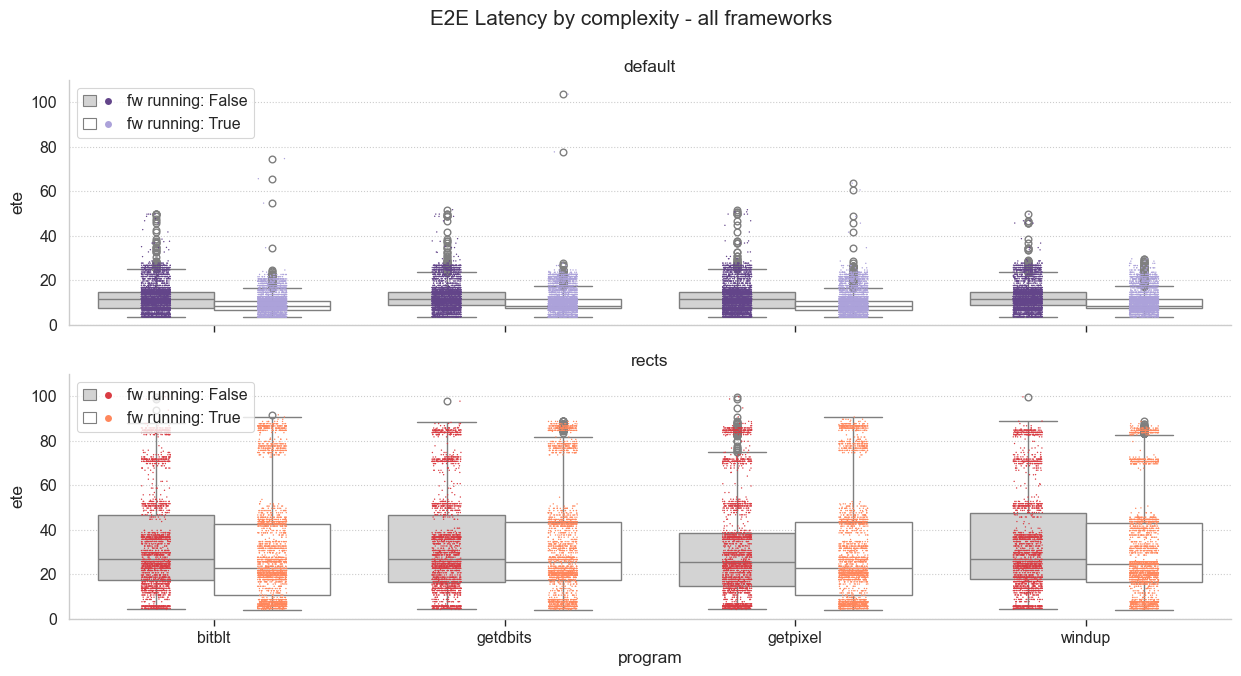

In [93]:
fig, axes = plt.subplots(2, 1, figsize=(15, 7), sharex=True, sharey=True)
fig.suptitle("E2E Latency by complexity - all frameworks")

sns.boxplot(ax=axes[0], data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', hue_order=[False, True], palette=['lightgrey', 'white'])
sns.stripplot(ax=axes[0], data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', hue_order=[False, True], dodge=True, palette=[COLOR_A, COLOR_A_ACCENT], size=1)
axes[0].set_title("default")
handles, labels = axes[0].get_legend_handles_labels()
handles_combined = [(handles[0], handles[2]), (handles[1], handles[3])]
axes[0].legend(handles_combined, ['fw running: ' + labels[0], 'fw running: ' + labels[1]], markerscale=5., loc='upper left', handler_map={tuple: HandlerTuple(ndivide=None)})

sns.boxplot(ax=axes[1], data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', hue_order=[False, True], palette=['lightgrey', 'white'])
sns.stripplot(ax=axes[1], data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', hue_order=[False, True], dodge=True, palette=[COLOR_B, COLOR_B_ACCENT], size=1)
axes[1].set_title("rects")
handles, labels = axes[1].get_legend_handles_labels()
handles_combined = [(handles[0], handles[2]), (handles[1], handles[3])]
axes[1].legend(handles_combined, ['fw running: ' + labels[0], 'fw running: ' + labels[1]], markerscale=5., loc='upper left', handler_map={tuple: HandlerTuple(ndivide=None)})

axes[1].set_ylim(0, 110)
sns.despine(bottom = False, left = False)


In [94]:
# FRAMEWORK = 'SDL2_OpenGL'
# fig, axes = plt.subplots(2, 1, figsize=(15, 7), sharex=True, sharey=True)
# fig.suptitle(f"E2E Latencies for {FRAMEWORK}")

# sns.boxplot(ax=axes[0], data=data[((data['complexity'] == 'default') & (data['framework'] == FRAMEWORK))], x='program', y='ete', hue='fw_running')
# sns.stripplot(ax=axes[0], data=data[((data['complexity'] == 'default') & (data['framework'] == FRAMEWORK))], x='program', y='ete', hue='fw_running', dodge=True, color='black', size=1)
# axes[0].set_title("default")

# sns.boxplot(ax=axes[1], data=data[((data['complexity'] == 'rects') & (data['framework'] == FRAMEWORK))], x='program', y='ete', hue='fw_running')
# sns.stripplot(ax=axes[1], data=data[((data['complexity'] == 'rects') & (data['framework'] == FRAMEWORK))], x='program', y='ete', hue='fw_running', dodge=True, color='black', size=1)
# axes[1].set_title("rects")

In [95]:
# fig, axes = plt.subplots(3, 1, figsize=(15, 7), sharex=True, sharey=True)
# fig.suptitle(f"End-to-end Latency by complexity")

# sns.boxplot(ax=axes[0], data=data[data['complexity'] == 'default'], x='framework', y='ete', hue='fw_running', hue_order=[False, True], dodge=True)
# sns.stripplot(ax=axes[0], data=data[data['complexity'] == 'default'], x='framework', y='ete', hue='fw_running', hue_order=[False, True], dodge=True, color='black', size=1)
# axes[0].set_title("default")

# sns.boxplot(ax=axes[1], data=data[data['complexity'] == 'rects'], x='framework', y='ete', hue='fw_running', hue_order=[False, True], dodge=True)
# sns.stripplot(ax=axes[1], data=data[data['complexity'] == 'rects'], x='framework', y='ete', hue='fw_running', hue_order=[False, True], dodge=True, color='black', size=1)
# axes[1].set_title("rects")

# offset = lambda p: transforms.ScaledTranslation(p/75.,0, plt.gcf().dpi_scale_trans)
# trans = plt.gca().transData
# sns.stripplot(ax=axes[2], data=data[data['complexity'] == 'default'], x='framework', y='ete', hue='fw_running', hue_order=[False, True], dodge=True, color='blue', size=1)
# sns.stripplot(ax=axes[2], data=data[data['complexity'] == 'rects'], x='framework', y='ete', hue='fw_running', hue_order=[False, True], dodge=True, color='red', transform=offset(0.05)+trans, size=1)
# axes[2].set_title("combined")

# axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
# axes[2].set_ylim(0, 100000)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_31928\3582163966.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#63458a'` for the same effect.

  plot = sns.stripplot(data=data_fw_not_running[data_fw_not_running['complexity'] == 'default'], x='framework', y='ete', hue='program', color=COLOR_A, transform=offset(-0.2)+trans, size=2)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_31928\3582163966.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#aca2da'` for the same effect.

  sns.stripplot(data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='ete', hue='program', color=COLOR_A_ACCENT, transform=offset(-0.1)+trans, size=2, legend='auto')
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_31928\3582163966.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed 

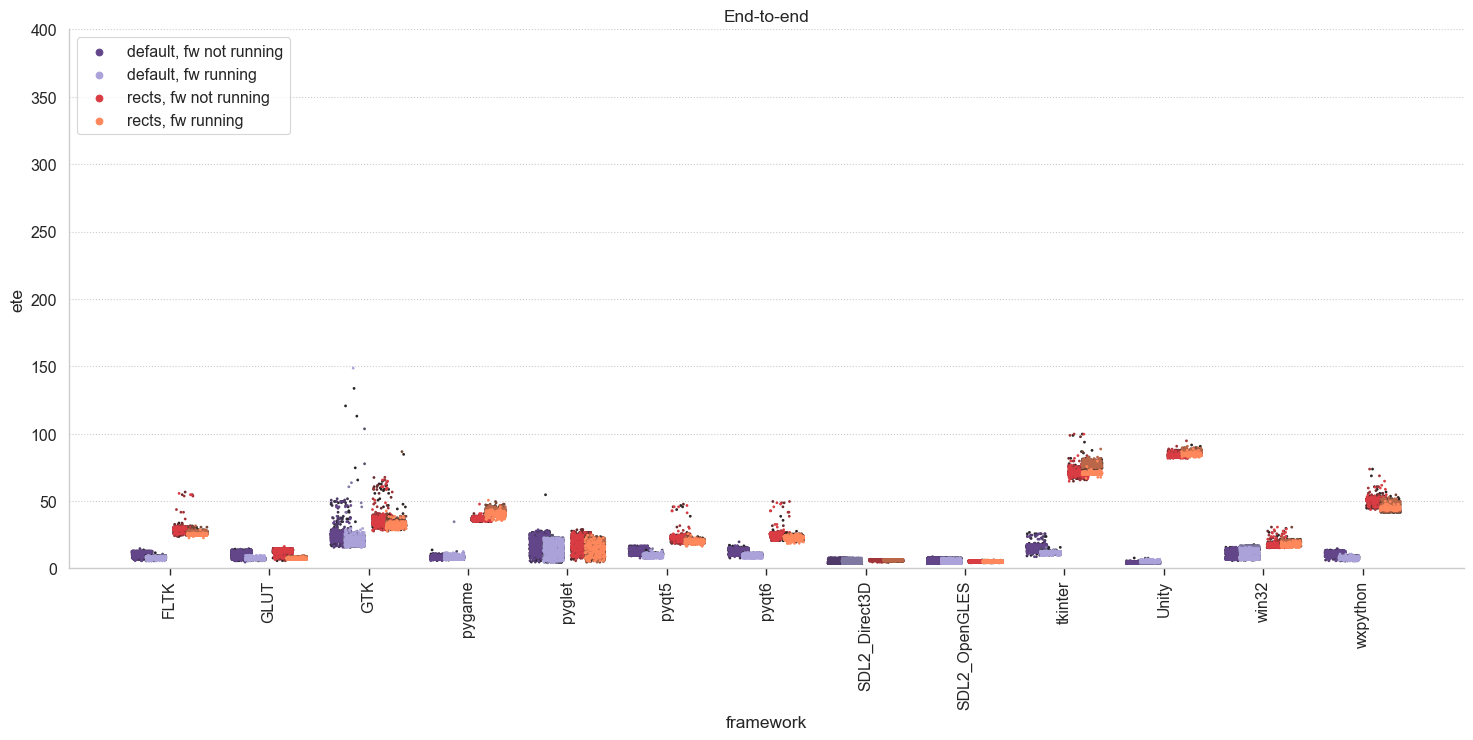

In [96]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data_fw_not_running[data_fw_not_running['complexity'] == 'default'], x='framework', y='ete', hue='program', color=COLOR_A, transform=offset(-0.2)+trans, size=2)
sns.stripplot(data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='ete', hue='program', color=COLOR_A_ACCENT, transform=offset(-0.1)+trans, size=2, legend='auto')
sns.stripplot(data=data_fw_not_running[data_fw_not_running['complexity'] == 'rects'], x='framework', y='ete', hue='program', color=COLOR_B, transform=offset(0.1)+trans, size=2)
sns.stripplot(data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='ete', hue='program', color=COLOR_B_ACCENT, transform=offset(0.2)+trans, size=2)

dot_legend_default_not_running=plot.scatter(0, -100, color=COLOR_A)
dot_legend_default_running=plot.scatter(0, -100, color=COLOR_A_ACCENT)
dot_legend_rects_not_running=plot.scatter(0, -100, color=COLOR_B)
dot_legend_rects_running=plot.scatter(0, -100, color=COLOR_B_ACCENT)

plot.legend(
    (dot_legend_default_not_running,
        dot_legend_default_running,
        dot_legend_rects_not_running,
        dot_legend_rects_running),
    ('default, fw not running',
        'default, fw running',
        'rects, fw not running',
        'rects, fw running'),
    loc='upper left'
)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.axes.set_ylim(0, 400)
plot.set_title('End-to-end')
sns.despine(bottom = False, left = False)

# Framework Latency

In [97]:
# fig, axes = plt.subplots(3, 1, figsize=(15, 7), sharex=True, sharey=True)
# fig.suptitle(f"Framework Latency by complexity")

# sns.boxplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='fw', hue='program', dodge=True)
# sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='fw', hue='program', dodge=True, color='black', size=1)
# axes[0].set_title("default")

# sns.boxplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='fw', hue='program', dodge=True)
# sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='fw', hue='program', dodge=True, color='black', size=1)
# axes[1].set_title("rects")

# offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
# trans = plt.gca().transData
# sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='fw', hue='program', dodge=True, color='blue', size=1)
# sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='fw', hue='program', dodge=True, color='red', transform=offset(0.05)+trans, size=1)
# axes[2].set_title("combined")

# axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)


C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_31928\4251986666.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


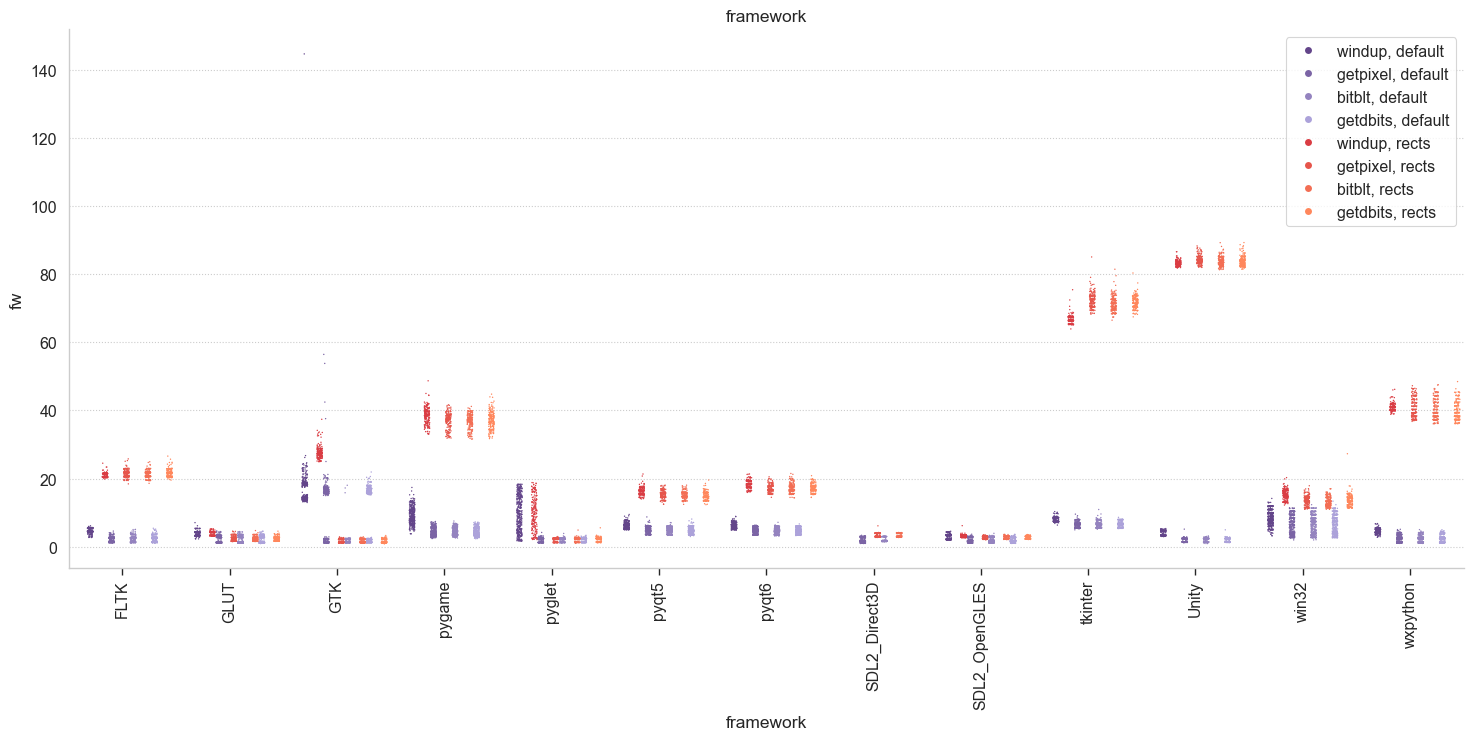

In [98]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=f'blend:{COLOR_A},{COLOR_A_ACCENT}', size=1)
sns.stripplot(data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=f'blend:{COLOR_B},{COLOR_B_ACCENT}', transform=offset(0.1)+trans, size=1)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
#plot.axes.set_ylim(0, 110)

handles, labels = plot.get_legend_handles_labels()
plot.legend(handles, [labels[0] + ', default', labels[1] + ', default',
                      labels[2] + ', default', labels[3] + ', default',
                      labels[4] + ', rects', labels[5] + ', rects',
                      labels[6] + ', rects', labels[7] + ', rects'], markerscale=5.)
plot.set_title('framework')
sns.despine(bottom = False, left = False)

In [99]:
# FRAMEWORK = 'pygame'
# fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
# fig.suptitle(f"Framework Latency for {FRAMEWORK}")

# sns.boxplot(ax=axes[0], data=data_fw_running[((data_fw_running['complexity'] == 'default') & (data_fw_running['framework'] == FRAMEWORK))], x='framework', y='fw', hue='program', dodge=True)
# sns.stripplot(ax=axes[0], data=data_fw_running[((data_fw_running['complexity'] == 'default') & (data_fw_running['framework'] == FRAMEWORK))], x='framework', y='fw', hue='program', dodge=True, color='black')
# axes[0].set_title("default")

# sns.boxplot(ax=axes[1], data=data_fw_running[((data_fw_running['complexity'] == 'rects') & (data_fw_running['framework'] == FRAMEWORK))], x='framework', y='fw', hue='program', dodge=True)
# sns.stripplot(ax=axes[1], data=data_fw_running[((data_fw_running['complexity'] == 'rects') & (data_fw_running['framework'] == FRAMEWORK))], x='framework', y='fw', hue='program', dodge=True, color='black')
# axes[1].set_title("rects")

# Difference

In [100]:
# fig, axes = plt.subplots(3, 1, figsize=(15, 7), sharex=True, sharey=True)
# fig.suptitle("Difference (E2E - FW)")

# sns.boxplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True)
# sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, color='black', size=1)
# axes[0].set_title("default")

# sns.boxplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True)
# sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, color='black', size=1)
# axes[1].set_title("rects")

# offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
# trans = plt.gca().transData
# sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, color='blue', size=1)
# sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, color='red', transform=offset(0.05)+trans, size=1)
# axes[2].set_title("combined")


# # for i in range(0, 20):
# #     plt.axhline(i*(1/480)*1000*1000, color='red')

# agg_mean = round(np.mean(diff_means), 1)
# plt.axhline(agg_mean, color='black')
# print(agg_mean)

# axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
# axes[2].set_ylim(-5000, 25000)

#plt.legend(loc='upper right')

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_31928\848181218.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


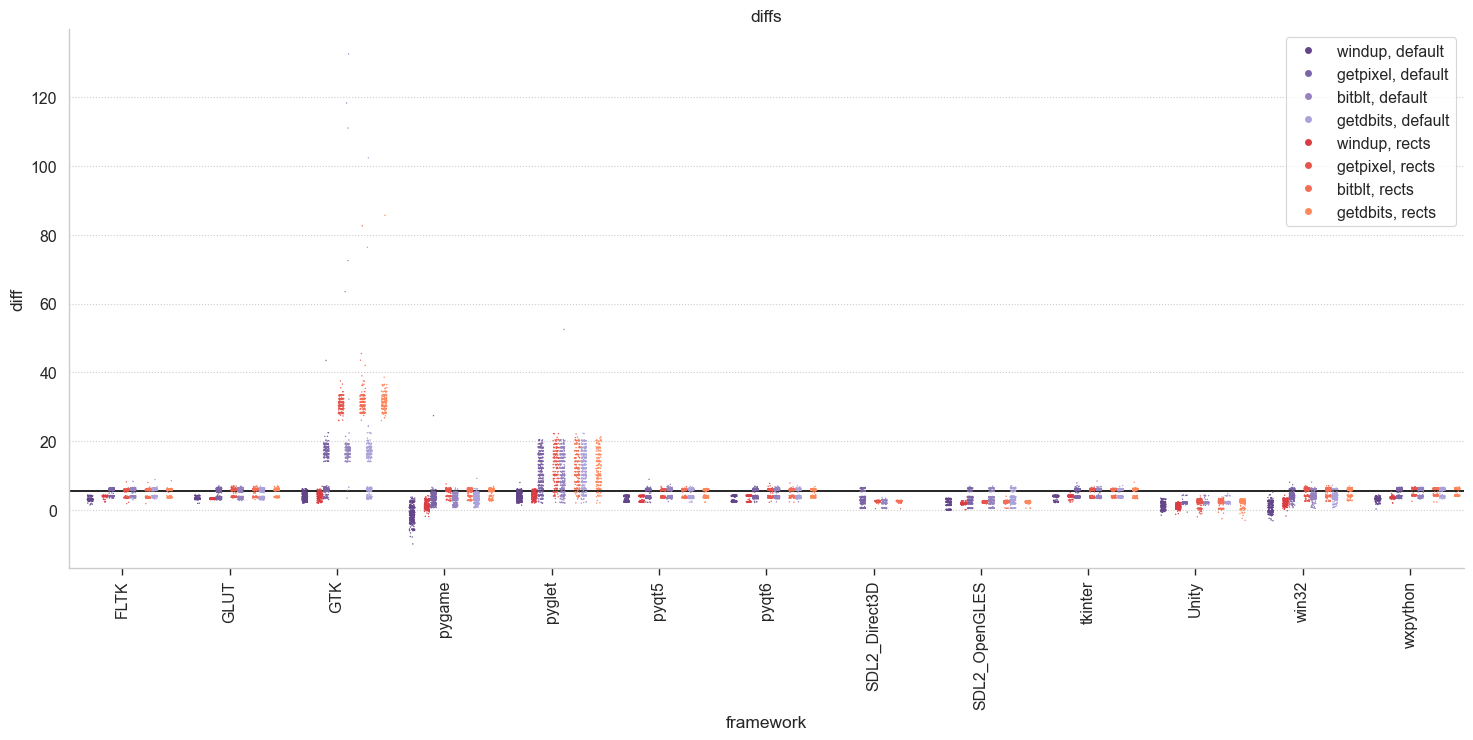

In [101]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=f'blend:{COLOR_A},{COLOR_A_ACCENT}', size=1)
sns.stripplot(data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=f'blend:{COLOR_B},{COLOR_B_ACCENT}', transform=offset(0.1)+trans, size=1)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
#plot.axes.set_ylim(-10, 45)

agg_mean = round(np.mean(diff_means), 1) / 1000
plt.axhline(agg_mean, color='black')

handles, labels = plot.get_legend_handles_labels()
plot.legend(handles, [labels[0] + ', default', labels[1] + ', default',
                      labels[2] + ', default', labels[3] + ', default',
                      labels[4] + ', rects', labels[5] + ', rects',
                      labels[6] + ', rects', labels[7] + ', rects'], markerscale=5.)
plot.set_title('diffs')
sns.despine(bottom = False, left = False)

# Dimensions

In [109]:
data_fw_not_running.loc[data_fw_not_running.fullscreen_mode.isna(), 'fullscreen_mode'] = '-1'


data_fullscreen = data_fw_running[data_fw_running['fullscreen'] == True]
data_not_fullscreen = data_fw_running[data_fw_running['fullscreen'] == False]
data_not_fullscreen

,Unnamed: 0,id,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,fw_running,program_fwrunning,ete,fw,diff
0,0,0,FLTK,default,FLTK_default,False,2.0,bitblt,True,bitblt_True,8.154,2.859,5.295
1,1,1,FLTK,default,FLTK_default,False,2.0,bitblt,True,bitblt_True,7.601,1.291,6.310
2,2,2,FLTK,default,FLTK_default,False,2.0,bitblt,True,bitblt_True,8.658,2.414,6.244
3,3,3,FLTK,default,FLTK_default,False,2.0,bitblt,True,bitblt_True,7.600,1.273,6.327
4,4,4,FLTK,default,FLTK_default,False,2.0,bitblt,True,bitblt_True,8.615,2.627,5.988
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,wxpython,default,wxpython_default,False,2.0,windup,True,windup_fullscreen_True,8.657,5.237,3.420
196,196,196,wxpython,default,wxpython_default,False,2.0,windup,True,windup_fullscreen_True,8.617,5.145,3.472
197,197,197,wxpython,default,wxpython_default,False,2.0,windup,True,windup_fullscreen_True,7.646,4.155,3.491
198,198,198,wxpython,default,wxpython_default,False,2.0,windup,True,windup_fullscreen_True,8.618,5.233,3.385


C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_31928\3923154324.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'ete of (non-)fullscreen applications with notification states')

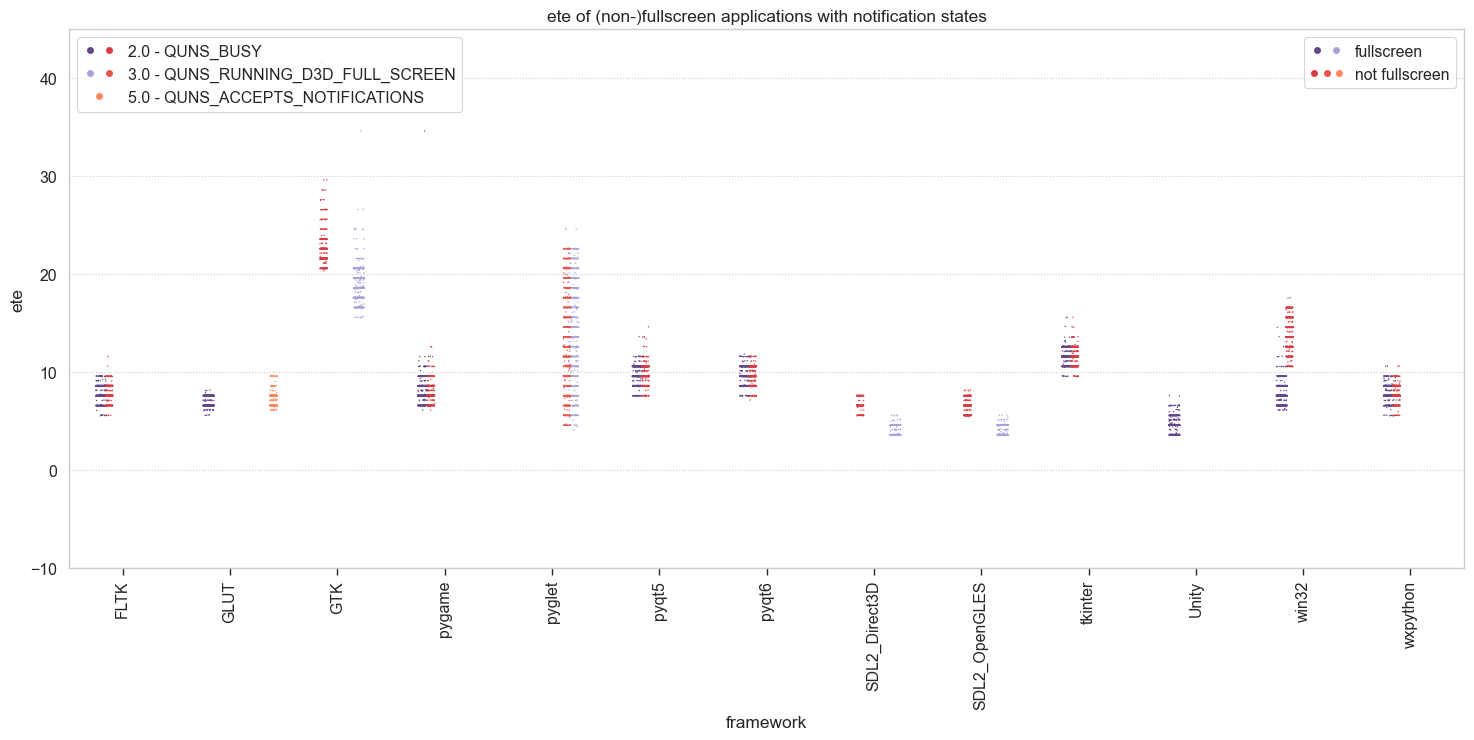

In [134]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data_fullscreen[data_fullscreen['complexity'] == 'default'], x='framework', y='ete', hue='fullscreen_mode', palette=f'blend:{COLOR_A},{COLOR_A_ACCENT}', hue_order=[2.0, 3.0, 5.0], dodge=True, size=1)
plot2 = sns.stripplot(data=data_not_fullscreen[data_not_fullscreen['complexity'] == 'default'], x='framework', y='ete', hue='fullscreen_mode', palette=f'blend:{COLOR_B},{COLOR_B_ACCENT}', hue_order=[2.0, 3.0, 5.0], dodge=True, transform=offset(0.1)+trans, size=1)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.axes.set_ylim(-10, 45)

# agg_mean = round(np.mean(diff_means), 1) / 1000
# plt.axhline(agg_mean, color='black')

handles, labels = plot.get_legend_handles_labels()
handles_combined = [(handles[0], handles[2]), (handles[1], handles[3]), (handles[4])]
test = plot.legend(handles_combined, [labels[0] + ' - QUNS_BUSY', labels[1] + ' - QUNS_RUNNING_D3D_FULL_SCREEN', labels[-1] + ' - QUNS_ACCEPTS_NOTIFICATIONS'], markerscale=5., loc='upper left', handler_map={tuple: HandlerTuple(ndivide=None)})

plt.gca().add_artist(test)

handles2, labels2 = plot2.get_legend_handles_labels()
handles_combined2 = [(handles2[0], handles2[1]), (handles2[2], handles2[3], handles2[4])]
plot2.legend(handles_combined2, ['fullscreen', 'not fullscreen'], markerscale=5., loc='upper right', handler_map={tuple: HandlerTuple(ndivide=None)})

plot.set_title('ete of (non-)fullscreen applications with notification states')
# sns.despine(bottom = False, left = False)

# Combined

In [ ]:
# FRAMEWORK = 'SDL2_OpenGL'
# fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
# fig.suptitle(f"Latency for {FRAMEWORK}")

# sns.boxplot(ax=axes[0], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='complexity', y='ete', hue='program', dodge=True, palette=[COLOR_A, COLOR_A_ACCENT])
# sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='complexity', y='ete', hue='program', dodge=True,  palette=['grey', 'grey'], size=2)
# axes[0].set_title("ent-to-end")

# sns.boxplot(ax=axes[1], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='complexity', y='fw', hue='program', dodge=True, palette=[COLOR_A, COLOR_A_ACCENT])
# sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='complexity', y='fw', hue='program', dodge=True,  palette=['grey', 'grey'], size=2)
# axes[1].set_title("framework")

# sns.boxplot(ax=axes[2], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='complexity', y='diff', hue='program', dodge=True, palette=[COLOR_A, COLOR_A_ACCENT])
# sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='complexity', y='diff', hue='program', dodge=True, palette=['grey', 'grey'], size=2)
# axes[2].set_title("diff")

# axes[2].set_ylim(-2, 10)